# Maven's Pizza Challenge

Are you looking for a real-world business case to test your analytics skills?

Need a dashboard project to showcase on your portfolio?

We have just what you need, including another chance to win a free all-access membership to Maven Analytics!

We’ve just added a fresh new data set to the Data Playground containing a year's worth of sales from a fictitious pizza place.

This data set is perfect for setting up a data model and leveraging your data analysis & visualization skills to bring the data underneath to life. So fire up your favorite BI tool (Excel, Power BI, Tableau, Python, etc.) and show us what you've got!

To go along with this release, we’re launching the Maven Pizza Challenge and giving away a free all-access membership to the winner.

We’ll share more about the challenge details below, but first let’s talk about the data…

About the dataset
This dataset contains 4 tables in CSV format
The Orders table contains the date & time that all table orders were placed
The Order Details table contains the different pizzas served with each order in the Orders table, and their quantities
The Pizzas table contains the size and price for each distinct pizza in the Order Details table, as well as its broader pizza type
The Pizza Types table contains details on the pizza types in the Pizzas table, including their name as it appears on the menu, the category it falls under, and its list of ingredients
How to play the Maven Pizza Challenge
For the Maven Pizza Challenge, you’ll be playing the role of a BI Consultant hired by Plato's Pizza, a Greek-inspired pizza place in New Jersey. You've been hired to help the restaurant use data to improve operations, and just received the following note:

Welcome aboard, we're glad you're here to help!

Things are going OK here at Plato's, but there's room for improvement. We've been collecting transactional data for the past year, but really haven't been able to put it to good use. Hoping you can analyze the data and put together a report to help us find opportunities to drive more sales and work more efficiently.

Here are some questions that we'd like to be able to answer:


<td>
    <li>What days and times do we tend to be busiest?</li>
    <li>How many pizzas are we making during peak periods?</li>
    <li>What are our best and worst selling pizzas?</li>
    <li>What's our average order value?</li>
    <li>How well are we utilizing our seating capacity?</li>
    <li>(we have 15 tables and 60 seats) That's all I can think of for now, but if you have any other ideas I'd love to hear them – you're the expert!</li>
</td>


Happy analyzing!

<H3>Objectives</H3>
<br>
<td>
    <li>What days and times are the busiet?</li>
    <li>How many pizzas are made during peak periods?</li>
    <li>What are the best and worst selling pizzas?</li>
    <li>What is the average order value?</li>
    <li>How well is the seating capacity utilized?</li>
</td>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

In [2]:
# import the dataset

df = pd.read_excel('Data Model - Pizza Sales.xlsx') 
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
# Shape of the dataset
shape = df.shape
print("This dataset has", shape[0], "rows and", shape[1], "columns")

This dataset has 48620 rows and 12 columns


## Data Wrangling

### Finding missing values

In [4]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

order_details_id
False    48620
Name: order_details_id, dtype: int64

order_id
False    48620
Name: order_id, dtype: int64

pizza_id
False    48620
Name: pizza_id, dtype: int64

quantity
False    48620
Name: quantity, dtype: int64

order_date
False    48620
Name: order_date, dtype: int64

order_time
False    48620
Name: order_time, dtype: int64

unit_price
False    48620
Name: unit_price, dtype: int64

total_price
False    48620
Name: total_price, dtype: int64

pizza_size
False    48620
Name: pizza_size, dtype: int64

pizza_category
False    48620
Name: pizza_category, dtype: int64

pizza_ingredients
False    48620
Name: pizza_ingredients, dtype: int64

pizza_name
False    48620
Name: pizza_name, dtype: int64



Fortunately there are no missing values in this dataset so can proceed to the next step.

In [5]:
# Check the datatypes of the columns
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

### Adding a DAY column to the dataframe

Let's add a date column that only includes days of the week.

In [7]:
from datetime import datetime 

In [7]:
date_list = df['order_date'].dt.strftime("%A %d %B %Y").str.split() 

date = []
for item in date_list:
    date.append(item[0])

df['day'] = date

In [9]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday


We now have a column that only has _**days of the week**_ which is going to be helpful later on when plot our visulalizations. 

## Exploratory Data Analysis

In [228]:
# import visualization libraries

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

### 1. What days and times are the busiet?

Text(0.5, 1.0, 'Number of Orders Per Weekday')

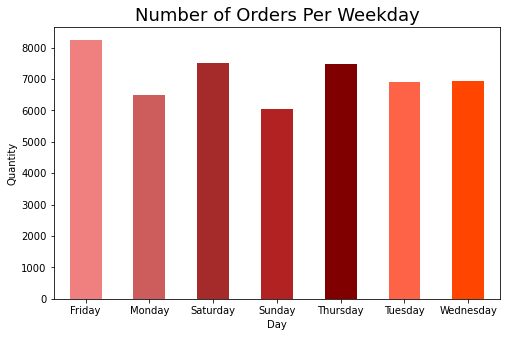

In [11]:
colors = ['lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'tomato', 'orangered']
df.groupby('day').sum()['quantity'].plot(kind='bar', rot=0, figsize=(8, 5), color = colors)

plt.xlabel('Day')
plt.ylabel('Quantity')
plt.title('Number of Orders Per Weekday', fontsize=18)

As we can see in a period of a year Fridays were the busiest in terms orders quantity.

Now to make our bar chart more appealing let's order the days of the week accordingly

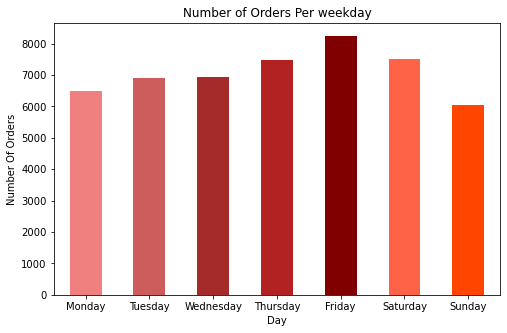

In [12]:
colors = ['lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'tomato', 'orangered']
# Create a reference sorting list
sort_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Create a dataframe
day_df = df.groupby('day').sum()['quantity']

# Sort the days of week in their order
day_df.index = pd.CategoricalIndex(day_df.index, categories=sort_order, ordered=True)
day_df = day_df.sort_index()

# Plot the barchart
day_df.plot(kind='bar', rot=0, figsize=(8, 5), color = colors)
plt.title('Number of Orders Per weekday')
plt.xlabel('Day')
plt.ylabel('Number Of Orders')
plt.show()

Now as we can see our barchart looks more appropriate. Thursdays, Fridays and Saturdays seems to be busiet with Fridays having the highest number of orders.  

In [13]:
day_df1 = day_df.to_frame()

day_df1['Average'] = day_df1['quantity'] / 52 # 52 is the approximation of how many times each week day comes in a year
day_df1[day_df1['Average'] == day_df1['Average'].max()]

,quantity,Average
day,,
Friday,8242,158.5


##### We can see that on average for every Friday orders turn to be higher than other days.

Now let's see which times are the busiest.

Text(0.5, 1.0, 'Frequency of Order Times')

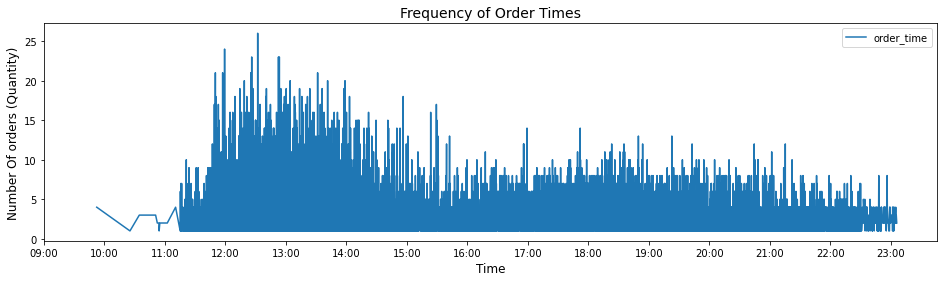

In [32]:
df['order_time'].value_counts().to_frame().plot(figsize=(16, 4))
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number Of orders (Quantity)', fontsize=12)
plt.xticks(['09:00', '10:00', '11:00', '12:00', '13:00', '14:00', 
            '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']);
plt.title('Frequency of Order Times', fontsize=14)

We can see from the above line chart that the busiest times are between 1200hrs and 1400hrs. Our chart is not clear enough but we see can that the highest peaks appear around the mentioned times.

Now let's try to work around our imperfect chart and make it more readable.<br>
We will start by creating an empty dataframe with times ranging from 0900hrs to 2300hrs as our columns. Then create lists of hours and populate them with the corresponding times using a *for loop*. And finally add the data from the lists to the empty dataframe. 

In [17]:
hours = ['09:00 - 09:59', '10:00 - 10:59', '11:00 - 11:59', '12:00 - 12:59', '13:00 - 13:59', 
        '14:00 - 14:59', '15:00 - 15:59', '16:00 - 16:59', '17:00 - 17:59', '18:00 - 18:59', 
        '19:00 - 19:59', '20:00 - 20:59', '21:00 - 21:59', '22:00 - 22:59', '23:00 - 23:59']

In [88]:
# Create an empty dataframe
time_df = pd.DataFrame(columns=hours, index=['frequency'])
time_df

,09:00 - 09:59,10:00 - 10:59,11:00 - 11:59,12:00 - 12:59,13:00 - 13:59,14:00 - 14:59,15:00 - 15:59,16:00 - 16:59,17:00 - 17:59,18:00 - 18:59,19:00 - 19:59,20:00 - 20:59,21:00 - 21:59,22:00 - 22:59,23:00 - 23:59
frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# dt['order_time'].dt.strftime("%H %M %S").str.split()
# Create a list of hours
nine_to_ten = []
ten_to_eleven = []
eleven_to_twelve = []
twelve_to_one = []
one_to_two = []
two_to_three = []
three_to_four = []
four_to_five = []
five_to_six = []
six_to_seven = []
seven_to_eight = []
eight_to_nine_ = []
_nine_to_ten = []
_ten_to_eleven = []
_eleven_to_twelve = []

# Using for loop to append the lists with their corresponding times
for time in df['order_time'].to_list():
    if (time.strftime("%H:%M:%S") >= '09:00:00') & (time.strftime("%H:%M:%S") < '10:00:00'):
        nine_to_ten.append(time) 
    # Ten to elven
    elif (time.strftime("%H:%M:%S") >= '10:00:00') & (time.strftime("%H:%M:%S") < '11:00:00'):
        ten_to_eleven.append(time)
    # 11 to 12
    elif (time.strftime("%H:%M:%S") >= '11:00:00') & (time.strftime("%H:%M:%S") < '12:00:00'):
        eleven_to_twelve.append(time)
    # 12 to 1
    elif (time.strftime("%H:%M:%S") >= '12:00:00') & (time.strftime("%H:%M:%S") < '13:00:00'):
        twelve_to_one.append(time)
    # 1 to 2
    elif (time.strftime("%H:%M:%S") >= '13:00:00') & (time.strftime("%H:%M:%S") < '14:00:00'): 
        one_to_two.append(time)
    # 2 to 3
    elif (time.strftime("%H:%M:%S") >= '14:00:00') & (time.strftime("%H:%M:%S") < '15:00:00'):
        two_to_three.append(time)
    # 3 to 4
    elif (time.strftime("%H:%M:%S") >= '15:00:00') & (time.strftime("%H:%M:%S") < '16:00:00'):
        three_to_four.append(time)
    # 4 to 5
    elif (time.strftime("%H:%M:%S") >= '16:00:00') & (time.strftime("%H:%M:%S") < '17:00:00'):
        four_to_five.append(time)
    # 5 to 6
    elif (time.strftime("%H:%M:%S") >= '17:00:00') & (time.strftime("%H:%M:%S") < '18:00:00'):
        five_to_six.append(time)
    # 6 to 7
    elif (time.strftime("%H:%M:%S") >= '18:00:00') & (time.strftime("%H:%M:%S") < '19:00:00'):
        six_to_seven.append(time)
    # 7 to 8
    elif (time.strftime("%H:%M:%S") >= '19:00:00') & (time.strftime("%H:%M:%S") < '20:00:00'):
        seven_to_eight.append(time)
    # 8 to 9pm
    elif (time.strftime("%H:%M:%S") >= '20:00:00') & (time.strftime("%H:%M:%S") < '21:00:00'):
        eight_to_nine_.append(time)
    # 9pm to 10pm
    elif (time.strftime("%H:%M:%S") >= '21:00:00') & (time.strftime("%H:%M:%S") < '22:00:00'):
        _nine_to_ten.append(time)
    # 10pm to 11pm
    elif (time.strftime("%H:%M:%S") >= '22:00:00') & (time.strftime("%H:%M:%S") < '23:00:00'):
        _ten_to_eleven.append(time)
    # 11pm to 00
    elif (time.strftime("%H:%M:%S") >= '23:00:00') & (time.strftime("%H:%M:%S") < '00:00:00'):
        _eleven_to_twelve.append(time)

In [90]:
# fill the time dataframe with frequency of the times
time_df['09:00 - 09:59'] = len(nine_to_ten)
time_df['10:00 - 10:59'] = len(ten_to_eleven)
time_df['11:00 - 11:59'] = len(eleven_to_twelve) 
time_df['12:00 - 12:59'] = len(twelve_to_one)
time_df['13:00 - 13:59'] = len(one_to_two)
time_df['14:00 - 14:59'] = len(two_to_three)
time_df['15:00 - 15:59'] = len(three_to_four)
time_df['16:00 - 16:59'] = len(four_to_five)
time_df['17:00 - 17:59'] = len(five_to_six)
time_df['18:00 - 18:59'] = len(six_to_seven)
time_df['19:00 - 19:59'] = len(seven_to_eight)
time_df['20:00 - 20:59'] = len(eight_to_nine_)
time_df['21:00 - 21:59'] = len(_nine_to_ten)
time_df['22:00 - 22:59'] = len(_ten_to_eleven)
time_df['23:00 - 23:59'] = len(_eleven_to_twelve)

time_df

,09:00 - 09:59,10:00 - 10:59,11:00 - 11:59,12:00 - 12:59,13:00 - 13:59,14:00 - 14:59,15:00 - 15:59,16:00 - 16:59,17:00 - 17:59,18:00 - 18:59,19:00 - 19:59,20:00 - 20:59,21:00 - 21:59,22:00 - 22:59,23:00 - 23:59
frequency,4,17,2672,6543,6203,3521,3170,4185,5143,5359,4350,3487,2528,1370,0


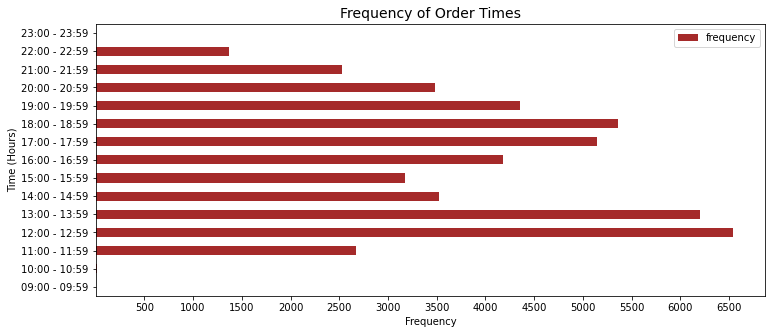

In [91]:
# Transpose the datframe and then make a horizontal barchart from it 
time_df.transpose().plot(kind='barh', figsize=(12, 5), color='brown')
plt.xlabel('Frequency')
plt.ylabel('Time (Hours)')
plt.title('Frequency of Order Times', fontsize=14)
plt.xticks([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500])
plt.show()

Now it is clearly enough that from 1200hrs to 1400hrs is the busiest time. This makes sense because people usually go for lunch around those times. Another busy time is between 1700hrs and 1900hrs.

### 2. How many pizzas are made during peak periods?

With reference to the horizontal bar chart above we can tell that the busiest hour of the day is 12 - 13pm. Now to get the number of pizzas made in this hour we can filter the data containing the times between 1200hrs and 1300hrs. And obtain the sum of the _'quantity'_ column.

In [73]:
data_f = df[(df['order_time'] >= time.fromisoformat('12:00:00')) & (df['order_time'] < time.fromisoformat('13:00:00'))]

In [85]:
data_f['quantity'].sum()

6776

In [94]:
len(data_f['order_id'].value_counts())

2520

According to the above results 6776 pizzas can be made and 2520 orders can placed during peak periods.

### 3. What are the best and worst selling pizzas?

In [115]:
# Creating the pivot table
pivot1 = pd.pivot_table(df, index='pizza_name', values=['order_id', 'quantity'], 
                        aggfunc = {'order_id':pd.Series.nunique, 'quantity':'sum'})


In [117]:
# Rename columns
pivot1.rename(columns={'order_id': 'Total Orders','quantity': 'Total Quantity'}, inplace=True)

In [136]:
# Sort the values in descending order
pivot1.sort_values(by=['Total Orders', 'Total Quantity'], ascending=False)

,Total Orders,Total Quantity
pizza_name,,
The Classic Deluxe Pizza,2329,2453
The Hawaiian Pizza,2280,2422
The Pepperoni Pizza,2278,2418
The Barbecue Chicken Pizza,2273,2432
The Thai Chicken Pizza,2225,2371
The California Chicken Pizza,2197,2370
The Southwest Chicken Pizza,1825,1917
The Spicy Italian Pizza,1822,1924
The Sicilian Pizza,1820,1938


As we can see from the above pivot table the best pizza is **The Classic Deluxe Pizza** with 2329 orders and 2453 pizzas were made from those orders.<br><br>
The worst selling pizza is **The Brie Carre Pizza** which had 480 orders and 490 pizzas were made. 

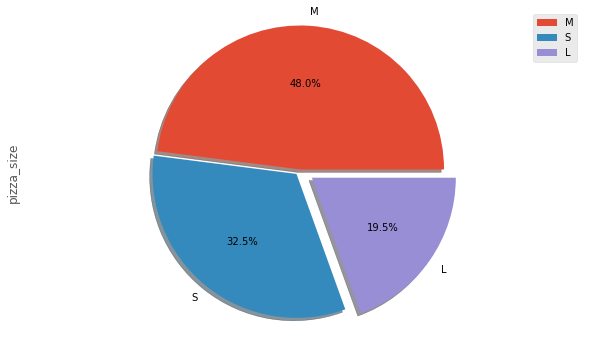

In [259]:
classic_del_pizza = df[df['pizza_name'] == 'The Classic Deluxe Pizza']
classic_del_pizza = classic_del_pizza['pizza_size'].value_counts().to_frame()
#labels = ['Medium', 'Small', 'Large']
explode = [0,0.04, 0.1]
classic_del_pizza.plot(kind='pie', subplots=True, 
                        figsize = (10, 6), explode=explode, shadow = True, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

Since we just discovered that _The Classic Delux Pizza_ is the best selling pizza we can also note that customers tend to order the M (Medium) size than other sizes which takes the ratio of 48%.

### 4. What's our average order value?

__Average Order Value (AOV) = Revenue / Number Of Orders__

In [135]:
# Calculating the average order value
AOV = df['total_price'].sum() / len(df['order_id'].value_counts())
AOV
print("The average order value is", AOV)

The average order value is 38.30726229508197


### 5. How well is the seating capacity utilized?

It was said that there are 15 tables and 60 seats so suppose that every table has 4 seats and 1 person consumes one pizza. The average number of pizzas ordered per order is 2 (6776 / 2520) which means only 2 seats are occupied in a 4 seat table. Therefore 30 out of 60 seats are occupied which is 50% occupancy of seating capacity. 

### Which pizza size is ordered the most?

In [148]:
pizza_size = df['pizza_size'].value_counts().to_frame()

In [149]:
pizza_size

,pizza_size
L,18526
M,15385
S,14137
XL,544
XXL,28


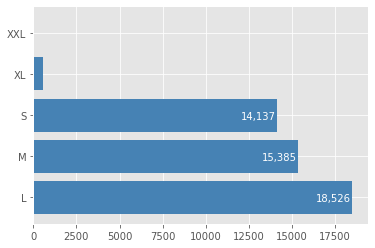

In [229]:
p_size = pizza_size.index.to_list()
p_quantity = pizza_size['pizza_size'].to_list()
plt.barh(p_size, p_quantity, color='steelblue')
for index, value in enumerate(p_quantity):
    label = format(int(value),',')
    plt.annotate(label, xy=(value - 2090, index - 0.1), color='white')
plt.show()

## Author

LinkedIn: <a href="https://www.linkedin.com/in/mosimanegape-mholo-4506a9220/" target="blank">Mosimanegape Mholo</a>
<br>
Github  : <a href="https://github.com/Mosimanegape">Mosimanegape Mholo</a>
<br>
